In [12]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
np.random.seed()

In [2]:
dice_data=np.array([1,2,3,4,5,6])

In [3]:
np.random.choice(dice_data,1)

array([1])

In [4]:
calc_steps=1000
dice_rolls=np.random.choice(dice_data,calc_steps)
for i in range(1,7):
    p=len(dice_rolls[dice_rolls==i])/calc_steps
    print(i,'が出る確率',p)

1 が出る確率 0.163
2 が出る確率 0.157
3 が出る確率 0.161
4 が出る確率 0.174
5 が出る確率 0.187
6 が出る確率 0.158


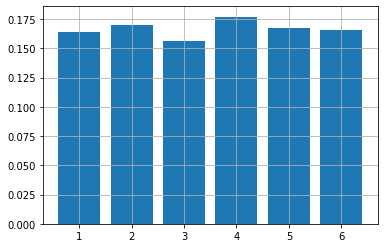

In [6]:
calc_steps=1000
dice_rolls=np.random.choice(dice_data,calc_steps)
prob_data=np.array([])
for i in range(1,7):
    p=len(dice_rolls[dice_rolls==i])/calc_steps
    prob_data=np.append(prob_data,len(dice_rolls[dice_rolls==i])/calc_steps)
plt.bar(dice_data,prob_data)
plt.grid(True)

In [42]:
prob_be_data=np.array([])
coin_data=np.array([0,0,0,0,0,1,1,1])
for i in np.unique(coin_data):
    p=len(coin_data[coin_data==i])/len(coin_data)
    print(i,'が出る確率',p)
    prob_be_data=np.append(prob_be_data,p)

0 が出る確率 0.625
1 が出る確率 0.375


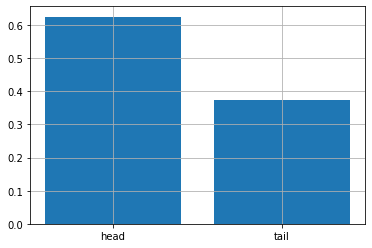

In [43]:
plt.bar([0,1],prob_be_data,align='center')
plt.xticks([0,1],['head','tail'])
plt.grid(True)

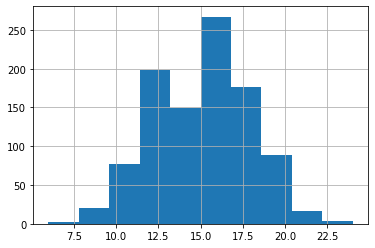

In [14]:
np.random.seed(0)
x=np.random.binomial(30,0.5,1000)
plt.hist(x)
plt.grid(True)

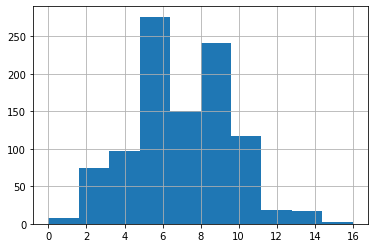

In [15]:
x=np.random.poisson(7,1000)
plt.hist(x)
plt.grid(True)

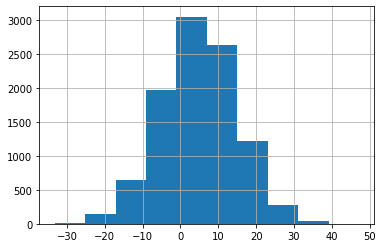

In [16]:
x=np.random.normal(5,10,10000)
plt.hist(x)
plt.grid(True)

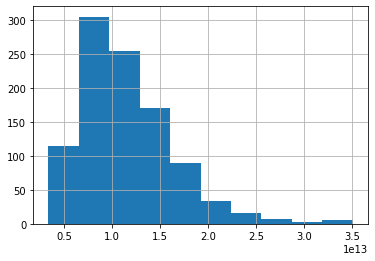

In [17]:
x=np.random.lognormal(30,0.4,1000)
plt.hist(x)
plt.grid(True)

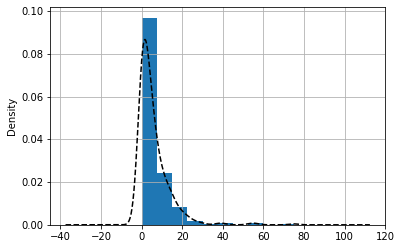

In [35]:
import requests
import zipfile
from io import StringIO
import io
zip_file_url='http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r=requests.get(zip_file_url,stream=True)
z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
student_data_math=pd.read_csv('student-mat.csv',sep=';')
student_data_math.absences.plot(kind='kde',style='k--')
student_data_math.absences.hist(density=True)
plt.grid(True)

In [19]:
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
x,y=np.mgrid[10:100:2,10:100:2]
pos=np.empty(x.shape+(2,))
pos[:,:,0]=x
pos[:,:,1]=y

In [20]:
rv=multivariate_normal([50,50],[[100,0],[0,100]])
z=rv.pdf(pos)

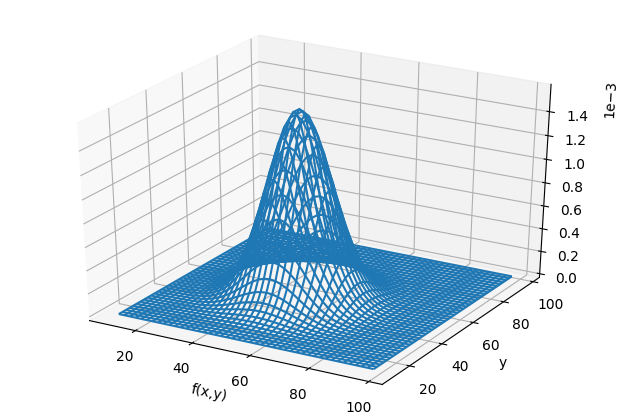

In [21]:
fig=plt.figure(dpi=100)
ax=Axes3D(fig)
ax.plot_wireframe(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlabel('f(x,y)')
ax.ticklabel_format(style='sci',axis='z',scilimits=(0,0))

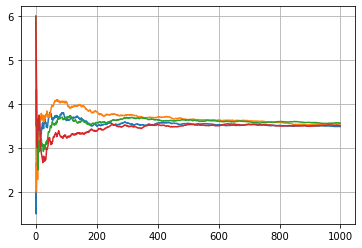

In [23]:
calc_times=1000
sample_array=np.array([1,2,3,4,5,6])
number_cnt=np.arange(1,calc_times+1)
for i in range(4):
    p=np.random.choice(sample_array,calc_times).cumsum()
    plt.plot(p/number_cnt)
    plt.grid(True)

In [24]:
def function_central_theory(N):
    sample_array=np.array([1,2,3,4,5,6])
    number_cnt=np.arange(1,N+1)*1.0
    mean_array=np.array([])
    for i in range(1000):
        cum_variables=np.random.choice(sample_array,N).cumsum()*1.0
        mean_array=np.append(mean_array,cum_variables[N-1]/N)
    plt.hist(mean_array)
    plt.grid(True)

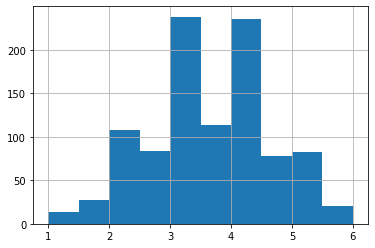

In [25]:
function_central_theory(3)

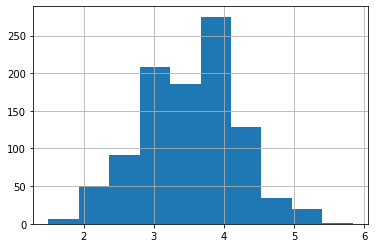

In [26]:
function_central_theory(6)

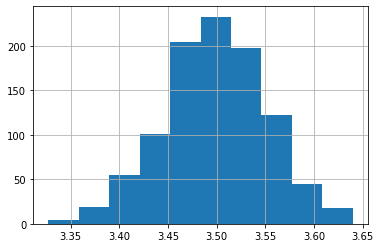

In [27]:
function_central_theory(10**3)

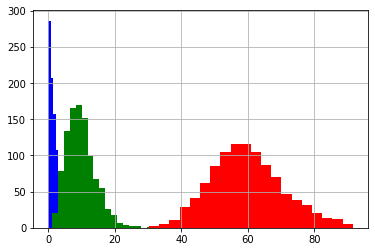

In [28]:
for df,c in zip([2,10,60],'bgr'):
    x=np.random.chisquare(df,1000)
    plt.hist(x,20,color=c)
    plt.grid(True)

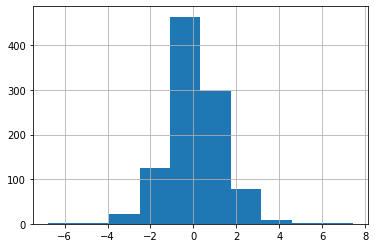

In [29]:
x=np.random.standard_t(5,1000)
plt.hist(x)
plt.grid(True)

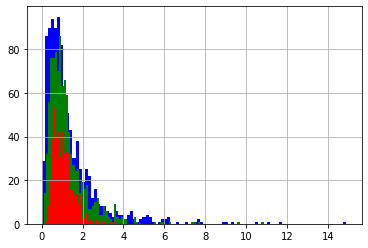

In [30]:
for df,c in zip([(6,7),(10,10),(20,25)],'bgr'):
    x=np.random.f(df[0],df[1],1000)
    plt.hist(x,100,color=c)
    plt.grid(True)

In [39]:
student_data_math=pd.read_csv('student-mat.csv',sep=';')
student_data_por=pd.read_csv('student-por.csv',sep=';')
student_data_merge=pd.merge(student_data_math,
                            student_data_por,
                            on=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],
                            suffixes=('_math','_por'))
print('G1数学　平均：',student_data_merge.G1_math.mean())
print('G1ポルトガル語　平均：',student_data_merge.G1_por.mean())

G1数学　平均： 10.861256544502618
G1ポルトガル語　平均： 12.112565445026178


In [40]:
from scipy import stats
t,p=stats.ttest_rel(student_data_merge.G1_math,student_data_merge.G1_por)
p

1.653655521710079e-16

##練習問題

In [47]:
coin_data=np.array([0,1])
calc_steps=1000
dice_rolls=np.random.choice(coin_data,calc_steps)
len(dice_rolls[dice_rolls==0])/calc_steps,len(dice_rolls[dice_rolls==1])/calc_steps

(0.504, 0.496)